In [1]:
#importing modules and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

2023-05-17 21:41:49.118334: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 21:41:49.212008: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 21:41:49.213137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 21:41:50.782639: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#dir_paths  
main_dir='New Masks Dataset/'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')
train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [3]:
train_mask_names=os.listdir(train_mask_dir)
print("Mask:\n",train_mask_names[:5])

train_nomask_names=os.listdir(train_nomask_dir)
print("Non-Mask:\n",train_nomask_names[:5])


Mask:
 ['0190.jpg', '1103.png', '0505.jpg', '1346.jpg', '0211.jpg']
Non-Mask:
 ['261.jpg', '93.jpg', '280.jpg', '322.jpg', '226.jpg']


In [4]:
#normalization
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
        horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='binary'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='binary'
)
valid_generator=train_datagen.flow_from_directory(
    valid_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(244,244,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 122, 122, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 64)        0

In [7]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])  


In [8]:
history=model.fit(train_generator,
                  epochs=17,
                  validation_data=valid_generator
)


Epoch 1/17


2023-05-17 21:41:55.275622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - ETA: 0s - loss: 8.2471 - accuracy: 0.5500

2023-05-17 21:42:48.594823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 69s 4s/step - loss: 8.2471 - accuracy: 0.5500 - val_loss: 0.6909 - val_accuracy: 0.5098
Epoch 2/17
19/19 [==============================] - 63s 3s/step - loss: 0.6628 - accuracy: 0.6217 - val_loss: 0.6911 - val_accuracy: 0.4902
Epoch 3/17
19/19 [==============================] - 63s 3s/step - loss: 0.5333 - accuracy: 0.7433 - val_loss: 0.6507 - val_accuracy: 0.7418
Epoch 4/17
19/19 [==============================] - 64s 3s/step - loss: 0.3883 - accuracy: 0.8517 - val_loss: 0.6116 - val_accuracy: 0.7059
Epoch 5/17
19/19 [==============================] - 68s 4s/step - loss: 0.3136 - accuracy: 0.8817 - val_loss: 0.5278 - val_accuracy: 0.7974
Epoch 6/17
19/19 [==============================] - 64s 3s/step - loss: 0.2609 - accuracy: 0.9100 - val_loss: 0.4680 - val_accuracy: 0.8007
Epoch 7/17
19/19 [==============================] - 63s 3s/step - loss: 0.2372 - accuracy: 0.9083 - val_loss: 0.4431 - val_accuracy: 0.8431
Epoch 8/17
19/19 [=============

In [9]:
test_loss,test_acc=model.evaluate(test_generator)
print('test acc : {} test loss : {}'.format(test_acc,test_loss))


2023-05-17 22:00:00.828773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 3s 621ms/step - loss: 0.2223 - accuracy: 0.9100
test acc : 0.9100000262260437 test loss : 0.22232019901275635


In [10]:
model.save('fmd_datamodel30_244.h5')

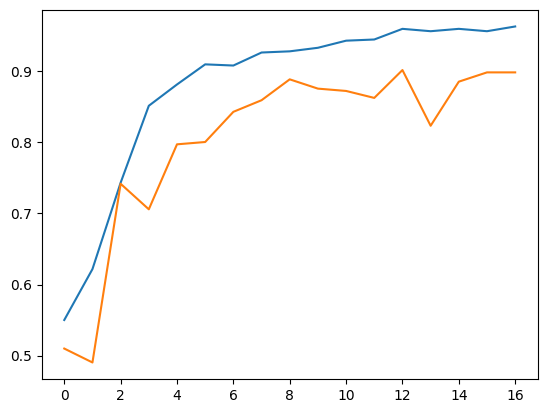

In [61]:
plt.plot(history.epoch,history.history["accuracy"])
plt.plot(history.epoch,history.history["val_accuracy"])
plt.show()

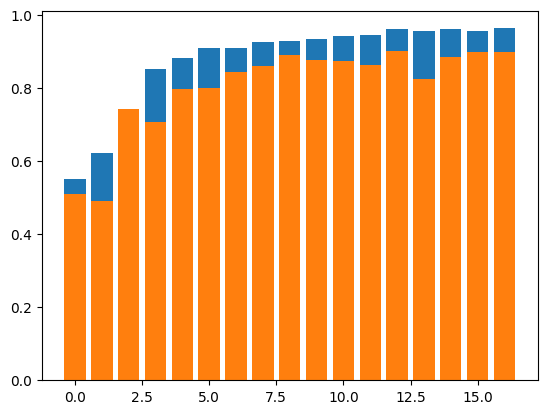

In [75]:
plt.bar(history.epoch,history.history["accuracy"])
plt.bar(history.epoch,history.history["val_accuracy"])
plt.show()

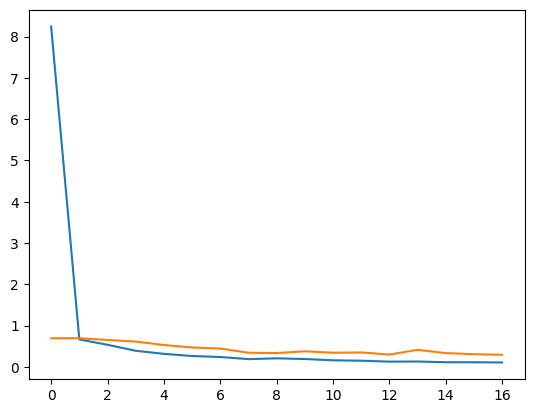

In [57]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()
plt.

In [74]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]